# Google Playstore App analysis

## Import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Import dataset

In [2]:
df = pd.read_csv("./googleplaystore.csv")

### Display first 10 rows

In [3]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19M,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29M,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33M,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1M,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


### Show data summary

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None


### Display data size

In [5]:
df.shape

(10841, 13)

### Print all column names

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Show data type columns

In [7]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

## Data cleaning

### Find missing values

In [8]:
print(df.isnull().sum(), "\n")
print("Total missing values: ", df.isnull().sum().sum())

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64 

Total missing values:  1487


### Drop null entries

In [9]:
df.dropna(inplace=True)

### Verify no null values

In [10]:
print(df.isnull().sum(), "\n")
print("Total missing values: ", df.isnull().sum().sum())

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64 

Total missing values:  0


### Remove duplicate data

In [11]:
df.drop_duplicates(subset="App", keep=False, inplace=True)

### Set appropriate data type of columns

In [12]:
df = df.astype(
    {
        "App": "string",
        "Category": "string",
        "Rating": "float",
        "Reviews": "int",
        "Size": "string",
        "Installs": "string",
        "Type": "string",
        "Price": "string",
        "Content Rating": "string",
        "Genres": "string",
    }
)
df.dtypes

App               string[python]
Category          string[python]
Rating                   float64
Reviews                    int64
Size              string[python]
Installs          string[python]
Type              string[python]
Price             string[python]
Content Rating    string[python]
Genres            string[python]
Last Updated              object
Current Ver               object
Android Ver               object
dtype: object

## Format columns

In [13]:
for ind in df.index:
    df["Installs"][ind] = df["Installs"][ind].replace(",", "").replace("+", "")

    df["Price"][ind] = df["Price"][ind].replace("$", "")

    if df["Size"][ind] == "Varies with device":
        df["Size"][ind] = "0"
    else:
        df["Size"][ind] = (
            df["Size"][ind]
            .replace("B", "")
            .replace("b", "")
            .replace("K", "")
            .replace("k", "")
            .replace("M", "")
            .replace("m", "")
            .replace("G", "")
            .replace("g", "")
        )

### Verify formatted columns

In [14]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880,28,1000000,Free,0,Everyone,Art & Design,"October 27, 2017",1.0.4,4.1 and up


### Change data type of formatted columns to int

In [15]:
df = df.astype({"Installs": "int", "Price": "float", "Size": "float"})
df.dtypes

App               string[python]
Category          string[python]
Rating                   float64
Reviews                    int64
Size                     float64
Installs                   int64
Type              string[python]
Price                    float64
Content Rating    string[python]
Genres            string[python]
Last Updated              object
Current Ver               object
Android Ver               object
dtype: object

## Calculate required variables

### Sort categories based on total number of installs in each category

In [16]:
top_10_installs = (
    df.groupby(by="Category")
    .sum()[["Installs", "Reviews"]]
    .sort_values(by=["Installs"], ascending=False)
    .reset_index()
)
top_10_installs

,Category,Installs,Reviews
0,GAME,6088662717,228326016
1,TOOLS,5149224500,187459486
2,FAMILY,4011958590,130688184
3,PHOTOGRAPHY,2160043130,49966599
4,VIDEO_PLAYERS,2126797200,31062982
5,PRODUCTIVITY,1745070180,22452395
6,BOOKS_AND_REFERENCE,1410291655,11484709
7,PERSONALIZATION,949341930,30928057
8,COMMUNICATION,911241530,22269166
9,HEALTH_AND_FITNESS,910956220,13245996


### Sort categories based on total number of reviews in each category

In [17]:
top_10_reviews = (
    df.groupby(by="Category")
    .sum()[["Reviews", "Installs"]]
    .sort_values(by=["Reviews"], ascending=False)
    .reset_index()
)
top_10_reviews

,Category,Reviews,Installs
0,GAME,228326016,6088662717
1,TOOLS,187459486,5149224500
2,FAMILY,130688184,4011958590
3,PHOTOGRAPHY,49966599,2160043130
4,VIDEO_PLAYERS,31062982,2126797200
5,PERSONALIZATION,30928057,949341930
6,SPORTS,30472540,882731465
7,SOCIAL,22597824,540841475
8,PRODUCTIVITY,22452395,1745070180
9,COMMUNICATION,22269166,911241530


### Calculate average installs and reviews per category

In [18]:
avg_installs_per_category = []
avg_reviews_per_category = []

for i in range(len(top_10_installs)):
    avg_install = (
        top_10_installs["Installs"][i]
        / df["Category"].value_counts()[top_10_installs["Category"][i]]
    )
    avg_review = (
        top_10_installs["Reviews"][i]
        / df["Category"].value_counts()[top_10_installs["Category"][i]]
    )

    avg_installs_per_category.append([top_10_installs["Category"][i], avg_install])

    avg_reviews_per_category.append([top_10_installs["Category"][i], avg_review])


df_avg_reviews = pd.DataFrame(avg_reviews_per_category, columns=["Category", "Average Reviews"])
df_avg_reviews.sort_values(by=["Average Reviews"], ascending=False, inplace=True)


df_avg_installs = pd.DataFrame(avg_installs_per_category, columns=["Category", "Average Installs"])
df_avg_installs.sort_values(by=["Average Installs"], ascending=False, inplace=True)

### Calculate average rating per category

In [19]:
top_10_rating = df.groupby(by="Category").sum()[["Rating"]].reset_index()

avg_rating_per_category = []

for i in range(len(top_10_rating)):
    avg_rating = (
        top_10_rating["Rating"][i]
        / df["Category"].value_counts()[top_10_rating["Category"][i]]
    )

    avg_rating_per_category.append([top_10_rating["Category"][i], avg_rating])


df_avg_rating = pd.DataFrame(avg_rating_per_category, columns=["Category", "Rating"])
df_avg_rating.sort_values(by=["Rating"], ascending=False, inplace=True)

## Data Visualization

### Pie chart of top 5 apps by total installs

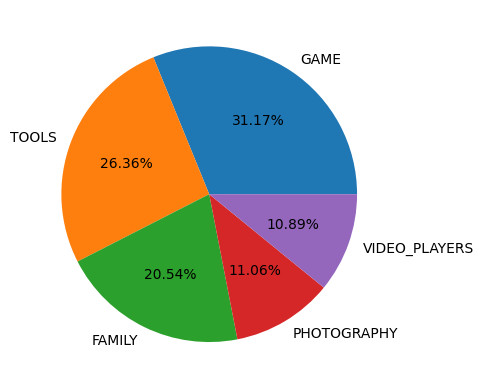

In [20]:
data = list(top_10_installs["Installs"][:5])
keys = list(top_10_installs["Category"][:5])

plt.pie(data, labels=keys, autopct="%.2f%%")
plt.show()

### Bar graph of all apps by average reviews

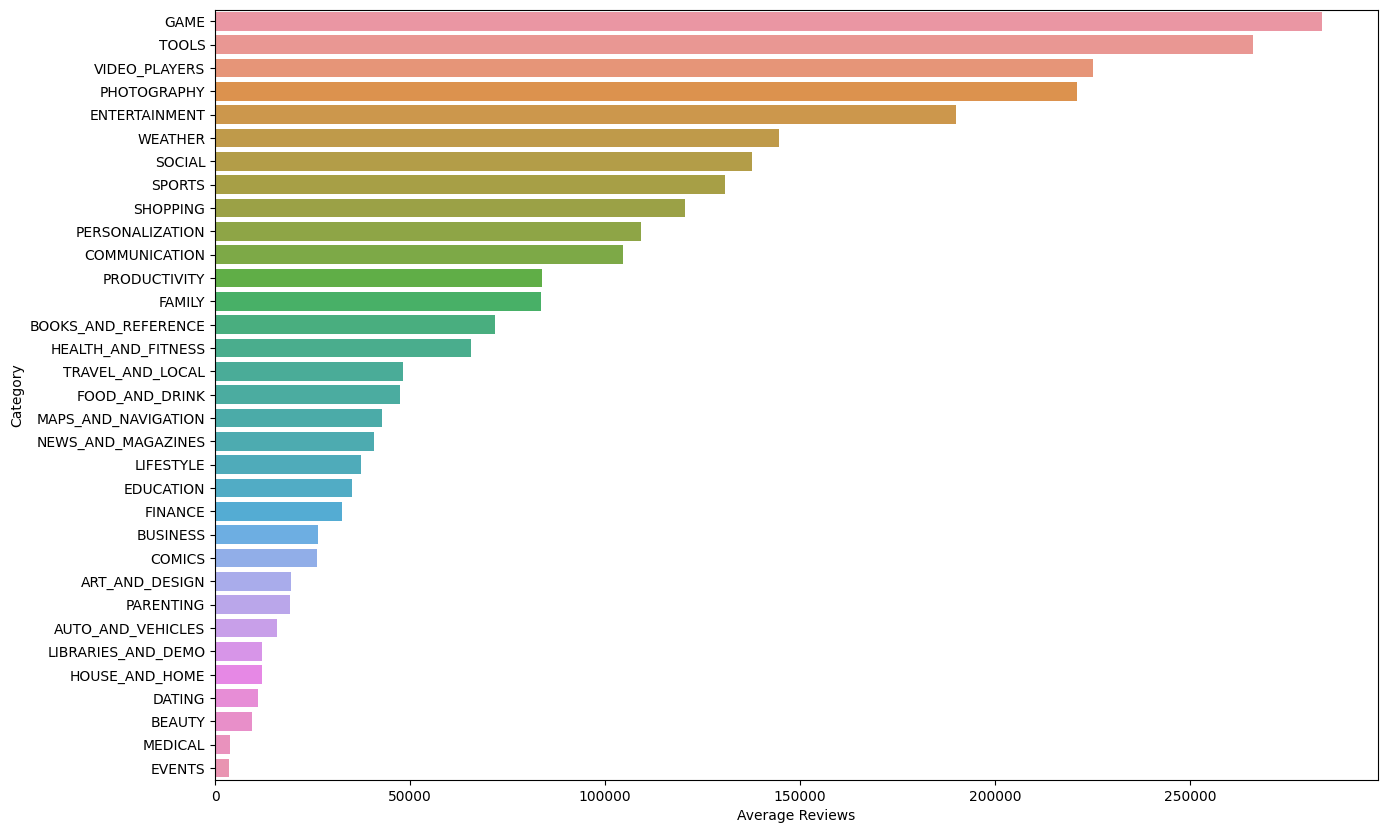

In [21]:
plt.figure(figsize=(15, 10))

ax = sns.barplot(
    data=df_avg_reviews,
    y="Category",
    x="Average Reviews",
    orientation="horizontal",
    linewidth=0.5,
)

### Bar graph of top 10 apps by average rating

(4.15, 4.45)

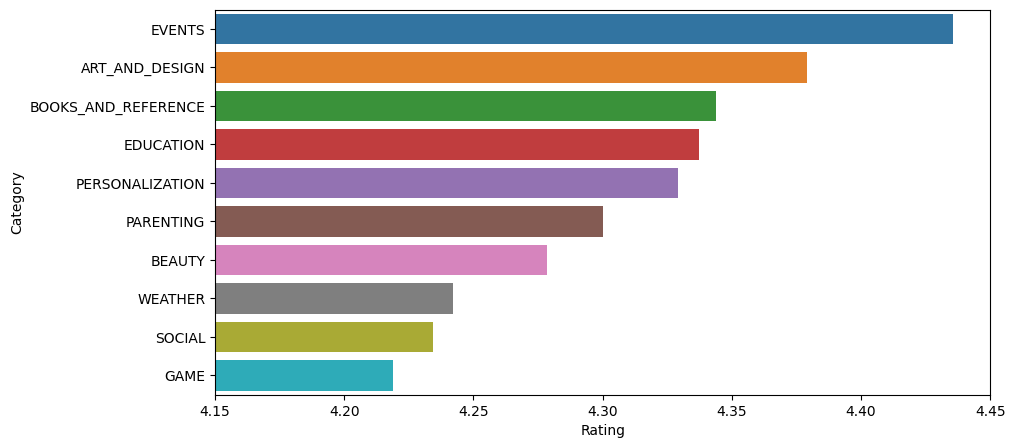

In [22]:
plt.figure(figsize=(10, 5))

ax = sns.barplot(
    data=df_avg_rating[:10],
    y="Category",
    x="Rating",
    orientation="horizontal",
    linewidth=0.5,
)
ax.set_xlim(4.15, 4.45)

## Label encoding of categorical data

In [23]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows 
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Category']= label_encoder.fit_transform(df['Category'])
df['Type']= label_encoder.fit_transform(df['Type'])
df['Content Rating']= label_encoder.fit_transform(df['Content Rating'])

## Multivariate Polynomial Regression model training

### Separate dependent and dependent vectors

In [24]:
# matrix of features
X = df.loc[:, ["Category", "Size", "Type", "Price", "Content Rating"]].values
# dependent variable vector
y = df.loc[:, ["Rating"]].values

In [25]:
print(X)

[[ 0.  19.   0.   0.   1. ]
 [ 0.   8.7  0.   0.   1. ]
 [ 0.  25.   0.   0.   4. ]
 ...
 [11.   3.6  0.   0.   1. ]
 [ 3.   0.   0.   0.   3. ]
 [18.  19.   0.   0.   1. ]]


In [26]:
print(y)

[[4.1]
 [4.7]
 [4.5]
 ...
 [5. ]
 [4.5]
 [4.5]]


### Split dataset into Training set and Testing set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

### Checking suitable degree

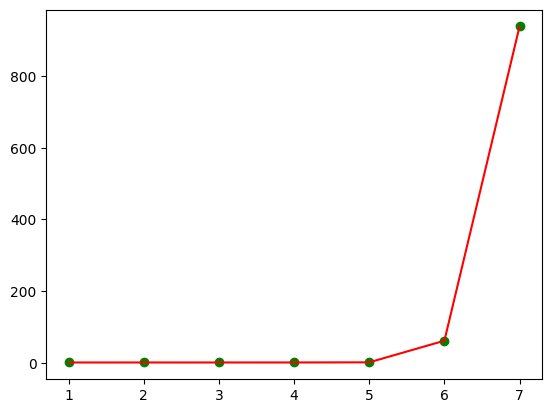

In [28]:
number_degrees = []
for i in range(7):
    number_degrees.append(i + 1)


plt_mean_squared_error = []
for degree in number_degrees:
    poly_model = PolynomialFeatures(degree=degree)

    poly_x_values = poly_model.fit_transform(X_train)
    poly_model.fit(poly_x_values, y_train)

    regression_model = LinearRegression()
    regression_model.fit(poly_x_values, y_train)

    y_pred = regression_model.predict(poly_model.fit_transform(X_test))

    mse = metrics.mean_squared_error(y_test, y_pred, squared=False)
    plt_mean_squared_error.append(mse)


plt.scatter(number_degrees, plt_mean_squared_error, color="green")
plt.plot(number_degrees, plt_mean_squared_error, color="red")

## Training degree 5 Multivariate Polynomial Regression model

In [29]:
DEGREE = 1
poly_model = PolynomialFeatures(degree=DEGREE)

poly_x_values = poly_model.fit_transform(X_train)
poly_model.fit(poly_x_values, y_train)

regression_model = LinearRegression()
regression_model.fit(poly_x_values, y_train)

y_pred = regression_model.predict(poly_model.fit_transform(X_test))

### Test dataset actual vs predicted

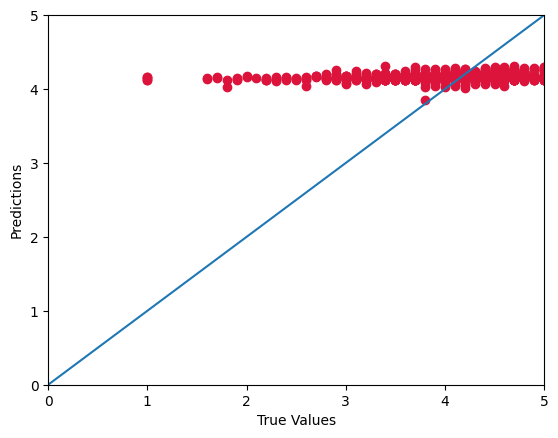

In [30]:
plt.scatter(y_test, y_pred, c="crimson")
plt.plot([0, 5], [0, 5])
plt.xlim(0, 5)
plt.ylim(0, 5)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

## Model Evaluation

### R-Square Error

In [31]:
r_square_error = metrics.r2_score(y_test, y_pred)
print(r_square_error)

0.014531164915603356


### Mean Square Error

In [32]:
mse = metrics.mean_squared_error(y_test, y_pred)
print(mse)

0.3258649429134749


### Root Mean Square Error

In [33]:
rmse = (metrics.mean_squared_error(y_test, y_pred) ** 0.5)
print(rmse)

0.5708458136077332


### Mean Absolute Error

In [34]:
mae = metrics.mean_absolute_error(y_test, y_pred)
print(mae)

0.4051201762105533


## Predict for user input

In [35]:
inputValues = ["Category", "Size", "Type", "Price", "Content Rating"]
newData = []

for i in inputValues:
    inputPrompt = "Enter App " + i + ": "
    newValue = float(input(inputPrompt))
    newData.append(newValue)


y_pred = regression_model.predict(poly_model.fit_transform([newData]))


print("The app is expected to get rating of", y_pred)

The app is expected to get rating of [[4.26084979]]
